## **Importando as bibliotecas necessárias para o projeto:**

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [9]:
# Realiza a cópia de uma pasta específica do drive no ambiente colab:
!cp -R /content/gdrive/MyDrive/cursos/segmentacao_imagens_ia_expert_academy/imagens/imagens imagens/

## **Segmentação baseada em limiarização**

### **Limiarização global (threshold ou binarização)**

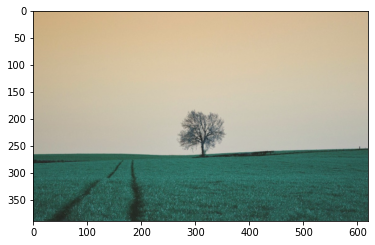

In [12]:
img = cv2.imread('/content/imagens/paisagem01.jpg')

# Plotagem da imagem. Existe uma diferença entre os canais Red e Green da imagem. 
# É necessário realizar a conversão de BGR para RGB
plt.imshow(img);

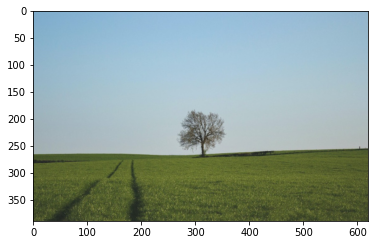

In [14]:
# Realizando a conversão de BGR para RGB com OpenCV
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Mostrando a imagem com os canais corrigidos:
plt.imshow(img_rgb);

### **Processo de limiarização ou binarização**

Antes de iniciar o processo de limiarização, se fazer necessário realizar a conversão dos canais RGB para níveis de cinza, ou seja, a imagem que antes poderia ser representada por um conjunto de $(x, y, z)$, agora passará a ser representada apenas por um par $(x, y)$